In [0]:
from google.colab import files
files.upload()

KeyboardInterrupt: ignored

In [0]:
!pip install -q kaggle

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d chetankv/dogs-cats-images
!unzip dogs-cats-images.zip
!unzip "dog vs cat.zip"

dogs-cats-images.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  dogs-cats-images.zip
replace dog vs cat.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: Archive:  dog vs cat.zip
replace dataset/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [0]:
from tensorflow.keras.applications.vgg16 import VGG16
#from keras.layers import Input, Flatten, Dense
#from keras.models import Model
import tensorflow as tf

from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
import glob
import numpy as np
import cv2

In [16]:
from tensorflow.python.client import device_lib

device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 12827791051072698299, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 12771964948621964812
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 9683061338528992979
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14892338381
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 1804215753656967244
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

In [0]:
config = tf.compat.v1.ConfigProto(allow_soft_placement=True, device_count = {'GPU': 1})
config.gpu_options.per_process_gpu_memory_fraction = 1
config.gpu_options.allow_growth = True


sess =  tf.compat.v1.Session(config=config)
with tf.device('/gpu:0'):

    def vgg2c():
    	model = VGG16(weights='imagenet', include_top=False)
    
    	#Create your own input format (here 3x200x200)
    	input = Input(shape=(224,224,3),name = 'image_input')
    
    	#Use the generated model 
    	output_vgg16_conv = model(input)
    
    	#Add the fully-connected layers 
    	x = Flatten(name='flatten')(output_vgg16_conv)
    	x = Dense(4096, activation='relu', name='fc1')(x)
    	x = Dense(4096, activation='relu', name='fc2')(x)
    	x = Dense(2, activation='softmax', name='predictions')(x)
    
    	#Create your own model 
    	my_model = Model(inputs=input, outputs=x)
    
    	return my_model

In [0]:
config = tf.compat.v1.ConfigProto(allow_soft_placement=True, device_count = {'GPU': 1})
config.gpu_options.per_process_gpu_memory_fraction = 1
config.gpu_options.allow_growth = True


sess =  tf.compat.v1.Session(config=config)
from tensorflow.python.client import device_lib


#device_lib.list_local_devices()
with tf.device('/gpu:0'):


    
    
    
    dogs_train = []
    cats_train = []
    dogs_test = []
    cats_test = []
    
    dogs_train_target = []
    cats_train_target = []
    dogs_test_target = []
    cats_test_target = []
    
    count=0
    for filename in glob.glob('dataset/training_set/dogs/*.jpg'): #assuming gif
        im = cv2.imread(filename)
        if count == 200:
            break
        try:
            im = cv2.resize(im,(224,224))
            #im = np.expand_dims(im, axis=0)
            im = preprocess_input(im)
            dogs_train.append(im)
            dogs_train_target.append([1,0])
            count+=1
        except:
            pass
    count=0
    for filename in glob.glob('dataset/training_set/cats/*.jpg'): #assuming gif
        im = cv2.imread(filename)
        if count == 200:
            break
        try:
            im = cv2.resize(im,(224,224))
            #im = np.expand_dims(im, axis=0)
            im = preprocess_input(im)
            cats_train.append(im)
            cats_train_target.append([0,1])
            count+=1
        except:
            pass
    count=0
    for filename in glob.glob('dataset/test_set/dogs/*.jpg'): #assuming gif
        im = cv2.imread(filename)
        if count == 200:
            break
        try:
            im = cv2.resize(im,(224,224))
            #im = np.expand_dims(im, axis=0)
            im = preprocess_input(im)
            dogs_test.append(im)
            dogs_test_target.append([1,0])
            count+=1
        except:
            pass
    count=0
    for filename in glob.glob('dataset/test_set/cats/*.jpg'): #assuming gif
        im = cv2.imread(filename)
        if count == 200:
            break
        try:
            im = cv2.resize(im,(224,224))
            #im = np.expand_dims(im, axis=0)
            im = preprocess_input(im)
            cats_test.append(im)
            cats_test_target.append([0,1])
            count+=1
        except:
            pass
    
    dogs_train = np.array(dogs_train)
    cats_train = np.array(cats_train)
    dogs_test = np.array(dogs_test)
    cats_test = np.array(cats_test)
    
    dogs_train_target = np.array(dogs_train_target)
    cats_train_target = np.array(cats_train_target)
    dogs_test_target = np.array(dogs_test_target)
    cats_test_target = np.array(cats_test_target)
    
    train_set = np.concatenate((dogs_train, cats_train))
    train_targets = np.concatenate((dogs_train_target, cats_train_target))
    
    test_set = np.concatenate((dogs_test, cats_test))
    test_targets = np.concatenate((dogs_test_target, cats_test_target))
    
    train_set, train_targets = shuffle(train_set, train_targets)
    test_set, test_targets = shuffle(test_set, test_targets)
    
    
    
    
    
#from tensorflow.python.client import device_lib

#device_lib.list_local_devices()

In [22]:
with tf.device('/gpu:0'):
  model = vgg2c()
  for layer in model.layers[:2]:
    layer.trainable=False
  
  model.compile(optimizer='adam',loss='categorical_crossentropy')
  model.summary()
    
  model.fit(train_set, train_targets, batch_size = 128, epochs = 100, verbose=0)
  print("training finished")

  score = model.evaluate(test_set, test_targets)
  print(score)

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image_input (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
vgg16 (Model)                multiple                  14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
fc1 (Dense)                  (None, 4096)              102764544 
_________________________________________________________________
fc2 (Dense)                  (None, 4096)              16781312  
_________________________________________________________________
predictions (Dense)          (None, 2)                 8194      
Total params: 134,268,738
Trainable params: 119,554,050
Non-trainable params: 14,714,688
____________________________________

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
i=0
predicted = model.predict(test_set)

W0818 19:17:33.953773 140416558454656 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0 1]  ==  [0. 1.]


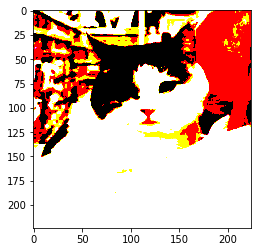

In [38]:
imgplot = plt.imshow(test_set[i])
print(test_targets[i], " == ", predicted[i])
i+=1